## Authorizing Client Credential


In [16]:
import json
import spotipy
import pandas as pd
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt


client_id = '#' #insert client id
client_secret = '#' # insertclient secret id here

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

playlist_id='46lwtifo6pvsCTS0nfoEgM' #insert  playlist id
results = sp.playlist(playlist_id)

## Convert JSON File to Dataframe

In [27]:
# create a list of song ids
ids=[]

for item in results['tracks']['items']:
        track = item['track']['id']
        ids.append(track)
        
song_meta={'id':[],'album':[], 'name':[], 
           'artist':[],'explicit':[],'popularity':[]}

for song_id in ids:
    # get song's meta data
    meta = sp.track(song_id)
    
    # song id
    song_meta['id'].append(song_id)

    # album name
    album=meta['album']['name']
    song_meta['album']+=[album]

    # song name
    song=meta['name']
    song_meta['name']+=[song]
    
    # artists name
    s = ', '
    artist=s.join([singer_name['name'] for singer_name in meta['artists']])
    song_meta['artist']+=[artist]
    
    # explicit: lyrics could be considered offensive or unsuitable for children
    explicit=meta['explicit']
    song_meta['explicit'].append(explicit)
    
    # song popularity
    popularity=meta['popularity']
    song_meta['popularity'].append(popularity)

song_meta_df=pd.DataFrame.from_dict(song_meta)

# check the song feature
features = sp.audio_features(song_meta['id'])
# change dictionary to dataframe
features_df=pd.DataFrame.from_dict(features)

# convert milliseconds to mins
# duration_ms: The duration of the track in milliseconds.
# 1 minute = 60 seconds = 60 × 1000 milliseconds = 60,000 ms
features_df['duration_ms']=features_df['duration_ms']/60000

# combine two dataframe
final_df=song_meta_df.merge(features_df)

# view dataframe
print(final_df.head())


                       id                                            album  \
0  4MbzauKV2ydtZZjLsPcuTF  Buckles Laboratories Presents: The Intermission   
1  0dAX78YVZtK3izR21SGxia  Buckles Laboratories Presents: The Intermission   
2  3FImu2LpSuH6gDHBuFgIbS                                  Spotify Singles   
3  2Eg5fW5yInLRGszS4s9eN6                                   Breaking Point   
4  77z6mJeFcHlRWVfbOdBCtc                            Good Morning Gorgeous   

                    name                artist  explicit  popularity  \
0            Spread Thin  Mariah the Scientist     False          72   
1                 Church  Mariah the Scientist     False          53   
2              DO 4 LOVE          Snoh Aalegra     False          65   
3         Breaking Point           Leon Thomas     False          61   
4  Good Morning Gorgeous         Mary J. Blige     False          50   

   danceability  energy  key  loudness  ...  instrumentalness  liveness  \
0         0.621   0.411

## Data processing

In [18]:
# Average value for each category

music_feature=features_df[['danceability', 'energy', 'loudness', 'speechiness',
                           'acousticness', 'instrumentalness', 'liveness', 
                           'valence', 'tempo', 'duration_ms']]

In [19]:
music_feature.describe()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,0.641470,0.518545,-7.843409,0.122198,0.329338,0.013053,0.158592,0.423483,106.155621,3.440081
std,0.122889,0.141907,2.306378,0.102539,0.263691,0.042328,0.104699,0.176903,26.641429,0.769762
min,0.367000,0.142000,-15.498000,0.031500,0.000573,0.000000,0.068100,0.078100,60.479000,2.327183
25%,0.571250,0.428750,-8.884750,0.054925,0.099600,0.000000,0.104250,0.322500,84.513000,2.914596
50%,0.642000,0.527000,-7.393500,0.075900,0.280500,0.000074,0.117000,0.390500,103.144000,3.330008
75%,0.723000,0.624500,-6.424000,0.176750,0.486000,0.000887,0.160750,0.546000,126.418750,3.832804
max,0.850000,0.889000,-3.654000,0.512000,0.925000,0.206000,0.575000,0.896000,175.805000,6.774450


Features in this dataset have vastly different sizes, making it difficult to compare their average values. This disparity in scale can skew the results of the analysis and introduce bias. To overcome this challenge, it's necessary to perform feature scaling. This will enable us to accurately compare the data points and draw meaningful conclusions from our analysis.





I opted for normalization, a scaling method that transforms values by shifting and rescaling them to a range of 0 to 1. It is commonly referred to as Min-Max scaling.

In [20]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])

C:\Users\Ronis\AppData\Local\Temp\ipykernel_20520\2538258249.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  music_feature.loc[:]=min_max_scaler.fit_transform(music_feature.loc[:])


### Creating a Radar Chart
Radar charts are the most effective when they are comparing various features. 

In [22]:
import math


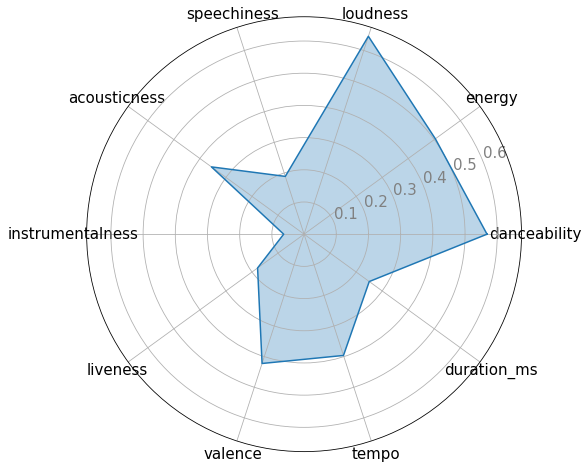

In [24]:
# plot size
fig=plt.figure(figsize=(12,8))

# convert column names into a list
categories=list(music_feature.columns)
# number of categories
N=len(categories)

# create a list with the average of all features
value=list(music_feature.mean())

# repeat first value to close the circle
# the plot is a circle, so we need to "complete the loop"
# and append the start value to the end.
value+=value[:1]
# calculate angle for each category
angles=[n/float(N)*2*math.pi for n in range(N)]
angles+=angles[:1]

# plot
plt.polar(angles, value)
plt.fill(angles,value,alpha=0.3)

# plt.title('Discovery Weekly Songs Audio Features', size=35)

plt.xticks(angles[:-1],categories, size=15)
plt.yticks(color='grey',size=15)
plt.show()